In [1]:
import sys
sys.path.append("../ml_models/")

from decision_tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

%load_ext autoreload
%autoreload 2

In [2]:
def make_meshgrid(x, y, h):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, **params)
    
def plot_decision_surface(X, y, clf, h=0.02):
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, h)
    
    plot_contours(clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.ylabel('Feature 0')
    plt.xlabel('Feature 1')
    plt.xticks(())
    plt.yticks(())
    plt.title('Decision surface')
    plt.show()

In [3]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [4]:
for purity in ['gini', 'entropy']:
    dt = DecisionTreeClassifier(purity)
    dt.fit(X_train, y_train)
    print(f"Decision tree with {purity} purity")
    print("Train accuracy:", dt.score(X_train, y_train))    
    print("Test accuracy: ", dt.score(X_test, y_test))

Decision tree with gini purity
Train accuracy: 1.0
Test accuracy:  0.9736842105263158
Decision tree with entropy purity
Train accuracy: 1.0
Test accuracy:  0.9736842105263158


In [5]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    flip_y=0.1,
    random_state=6
)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

Decision tree with gini purity
Train accuracy: 0.9813333333333333
Test accuracy:  0.792


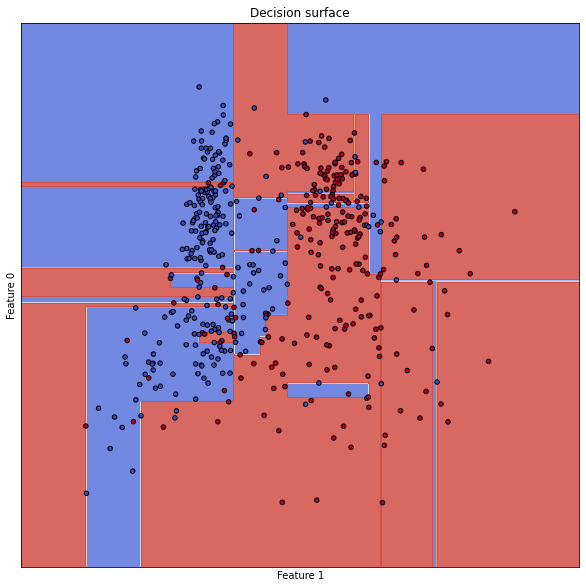

Decision tree with entropy purity
Train accuracy: 0.9706666666666667
Test accuracy:  0.824


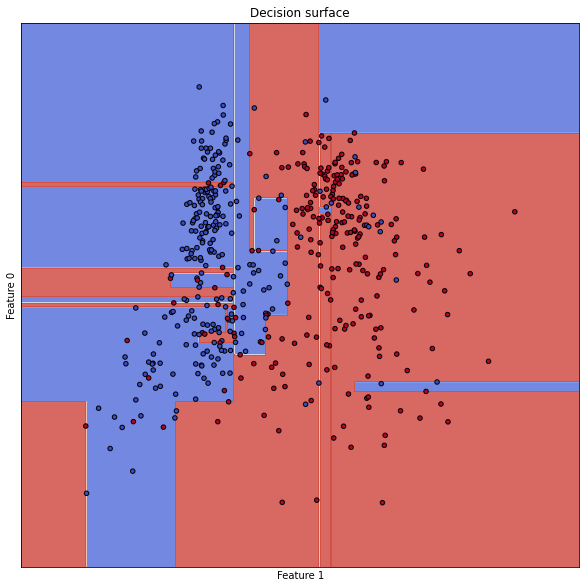

In [6]:
for purity in ['gini', 'entropy']:
    dt = DecisionTreeClassifier(purity, min_samples_split=5, max_depth=8)
    dt.fit(X_train, y_train)
    print(f"Decision tree with {purity} purity")
    print("Train accuracy:", dt.score(X_train, y_train))    
    print("Test accuracy: ", dt.score(X_test, y_test))
    plot_decision_surface(X, y, dt, 0.01)